In [1]:
pip install pandas numpy matplotlib seaborn jupyterlab

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [3]:
    #3.2 TEAM COMPARISON ANALYSIS

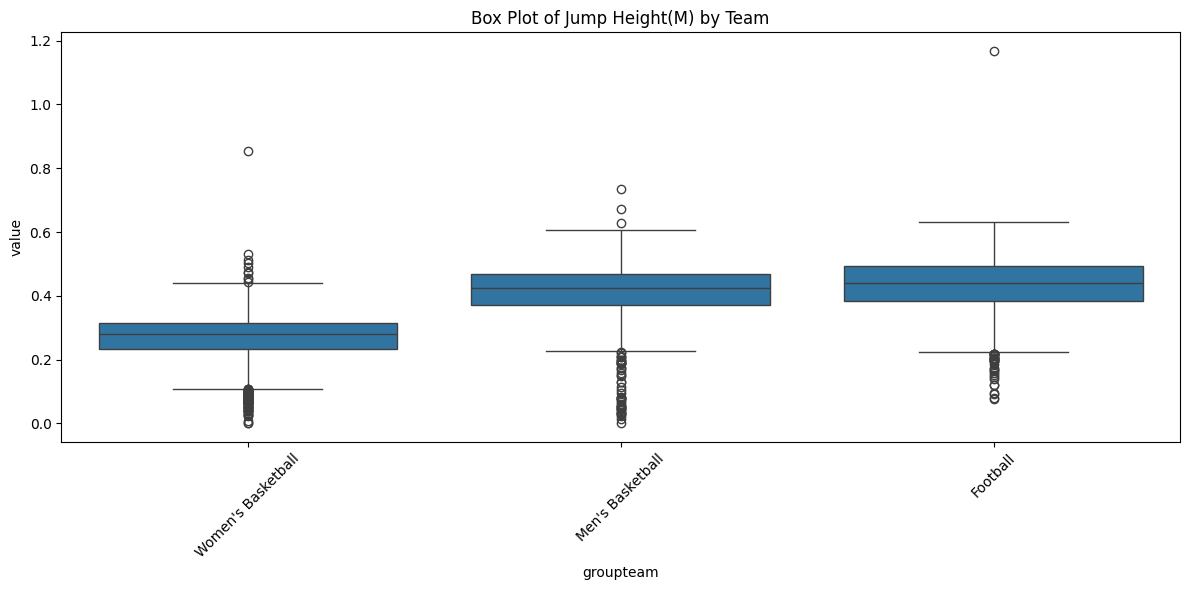

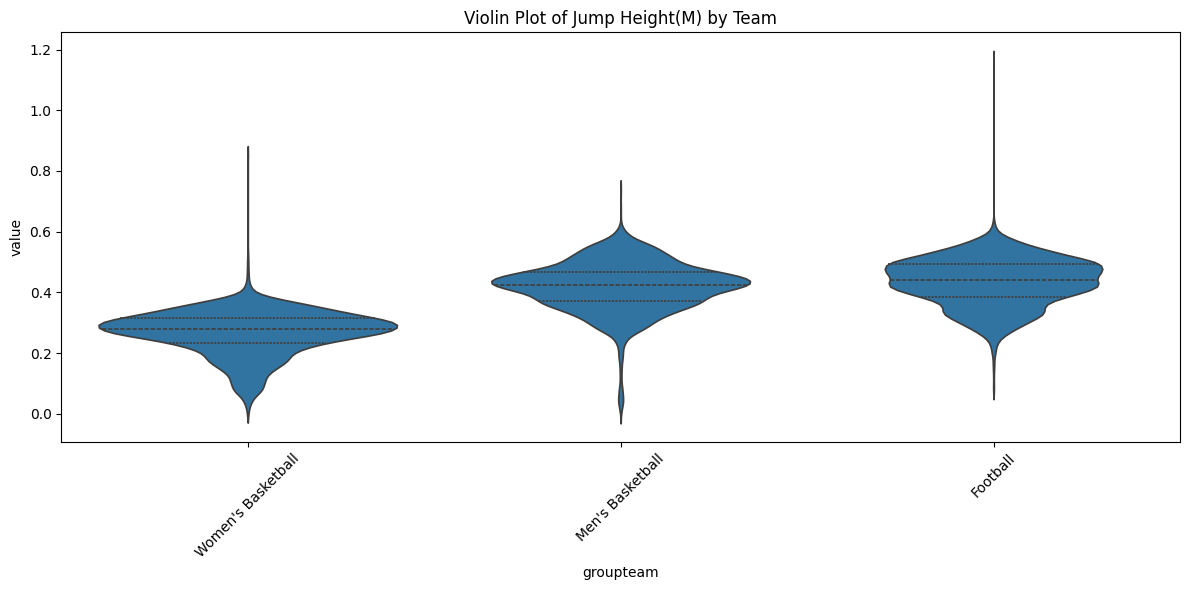

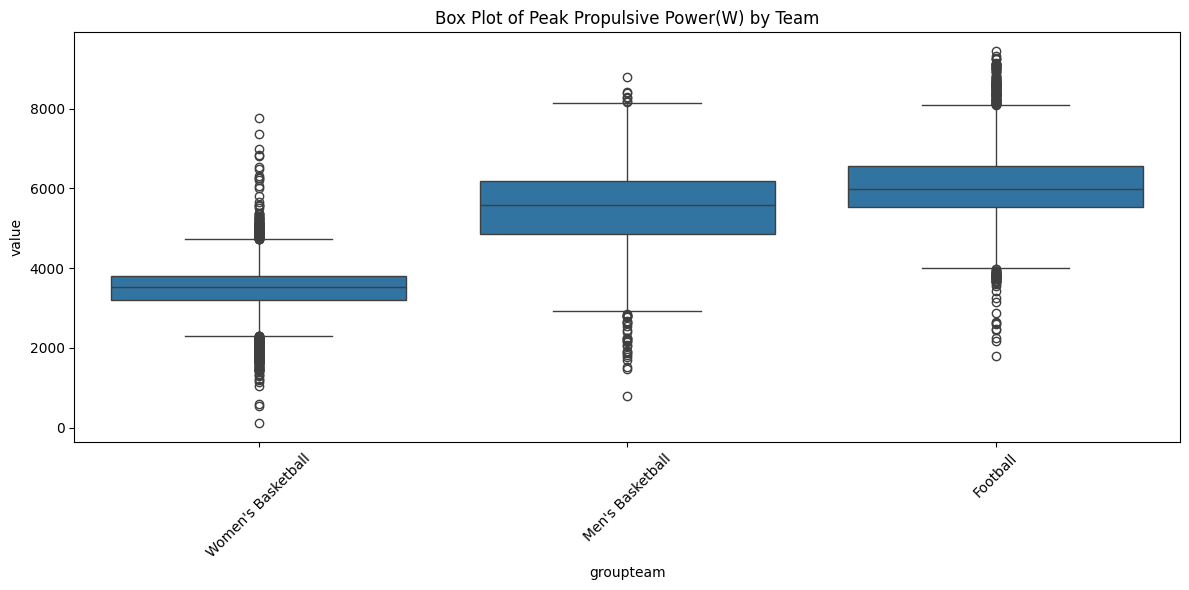

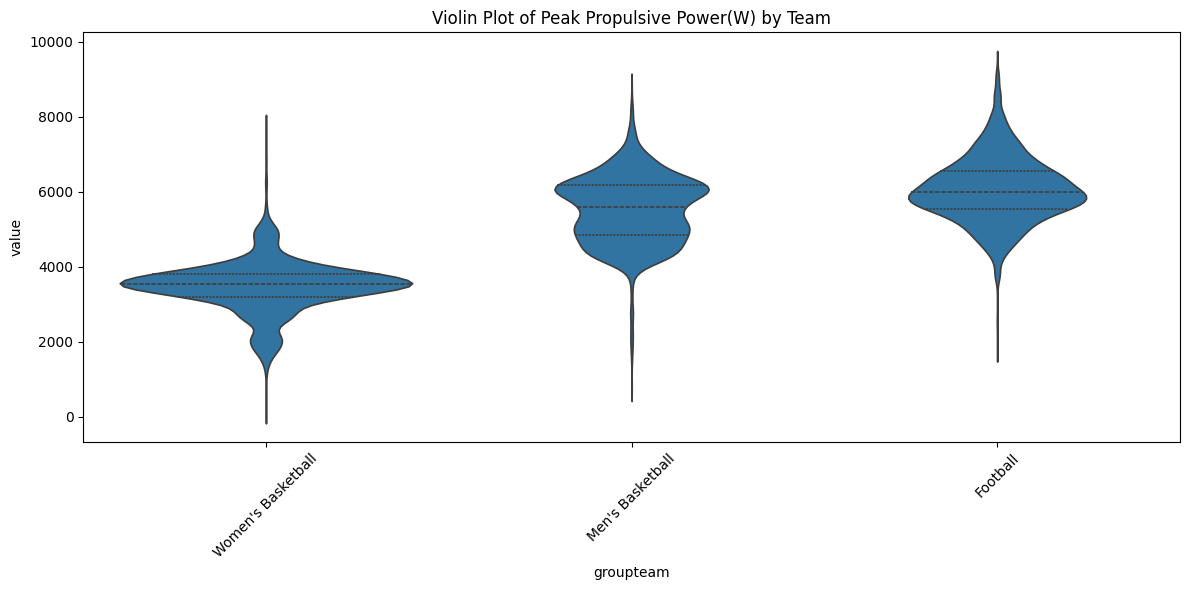

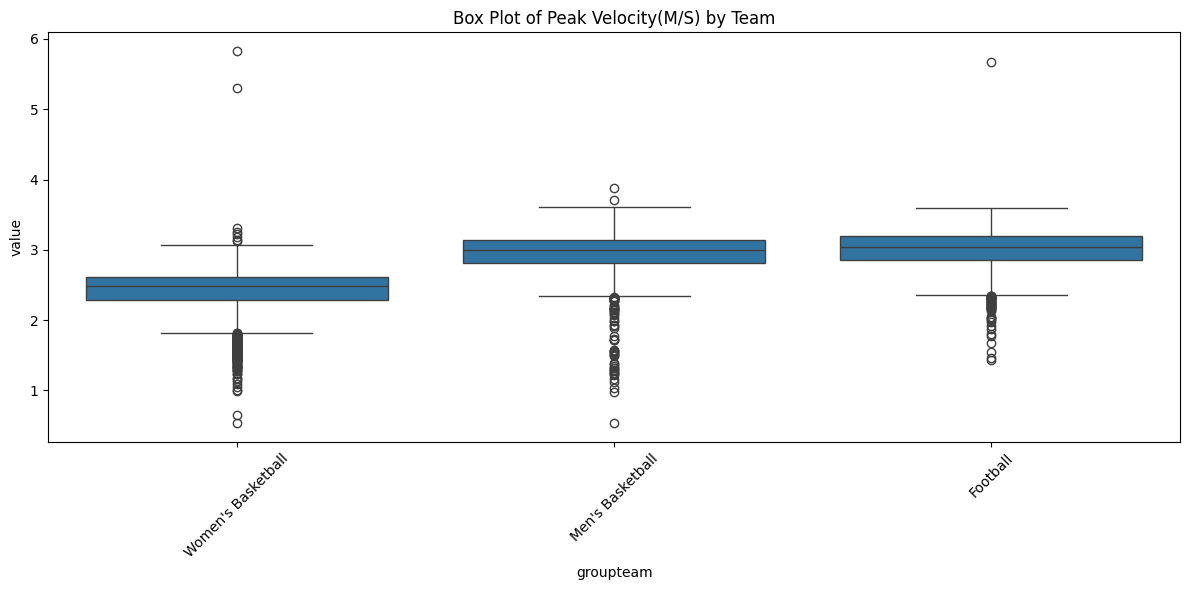

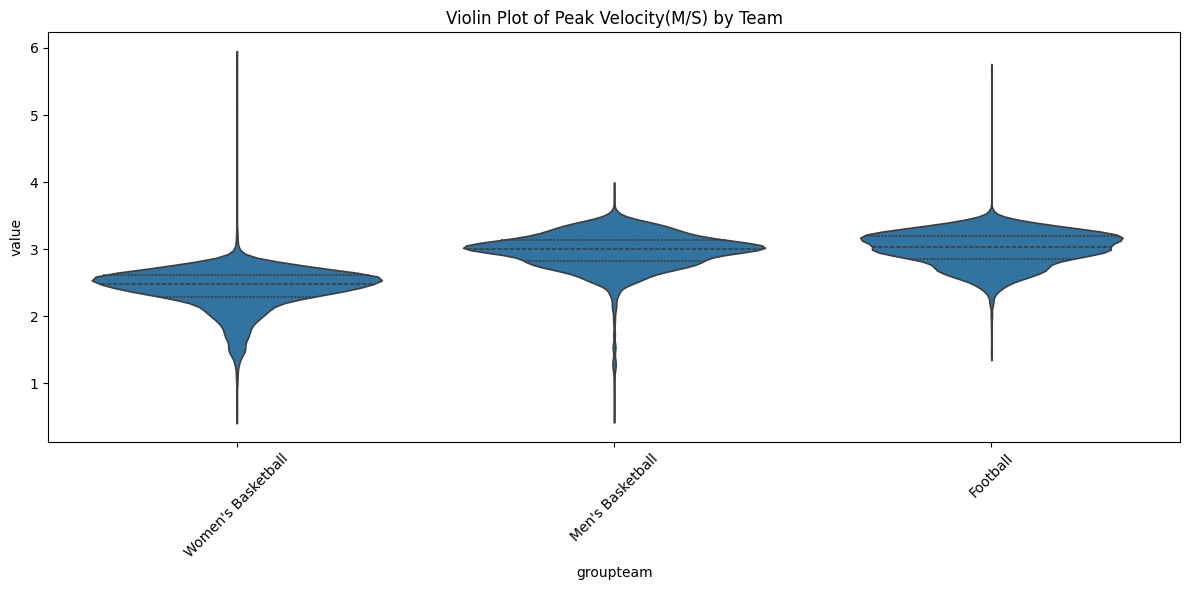

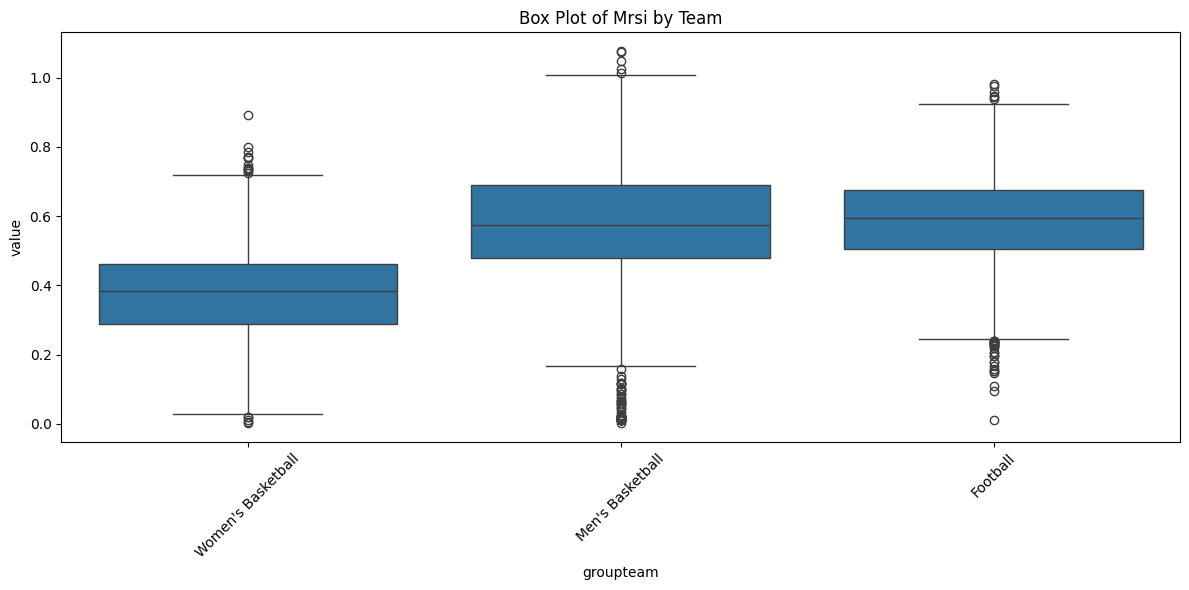

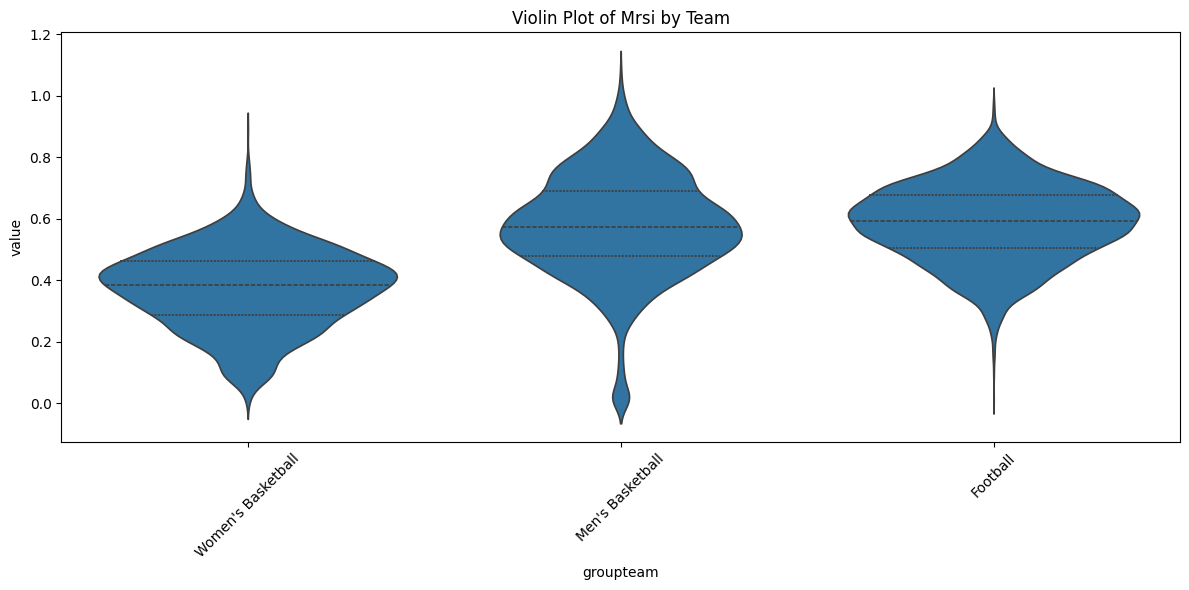

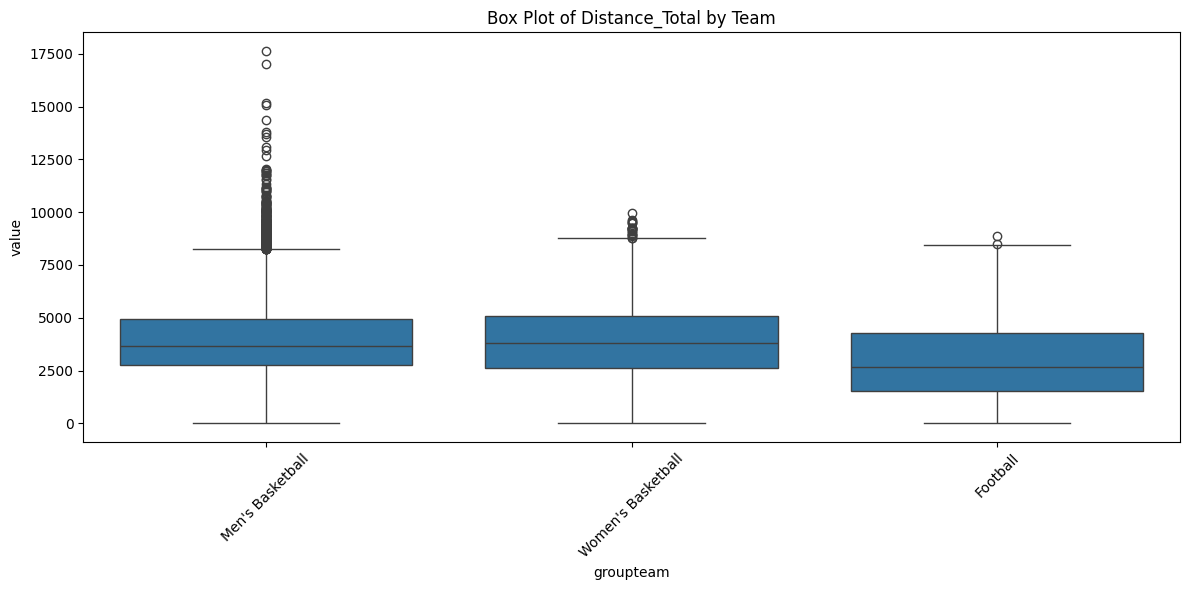

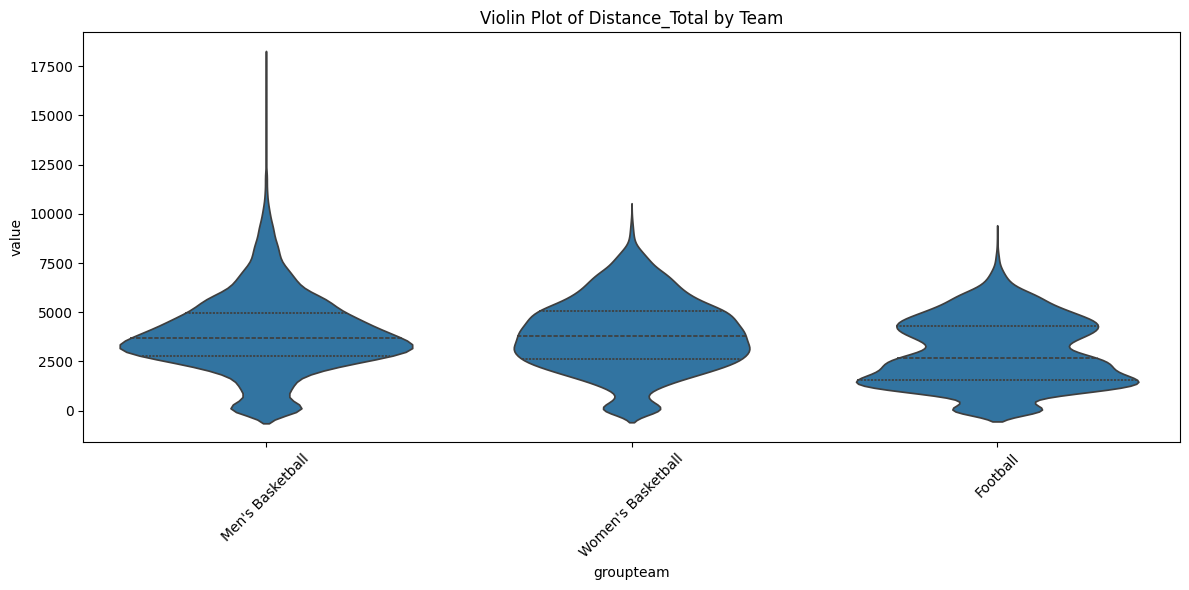

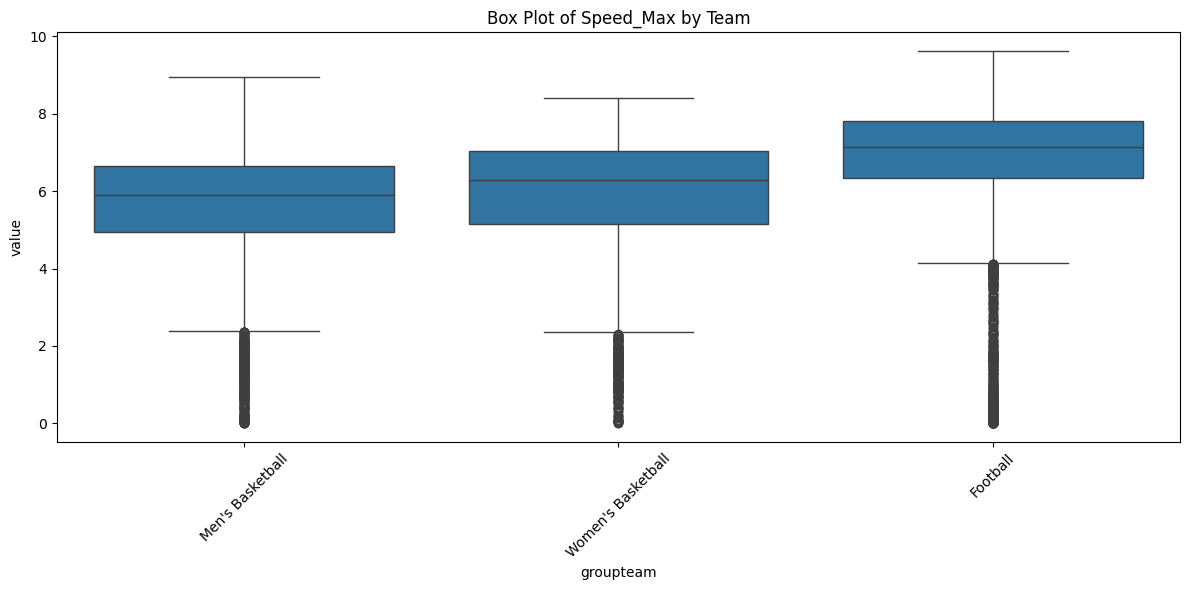

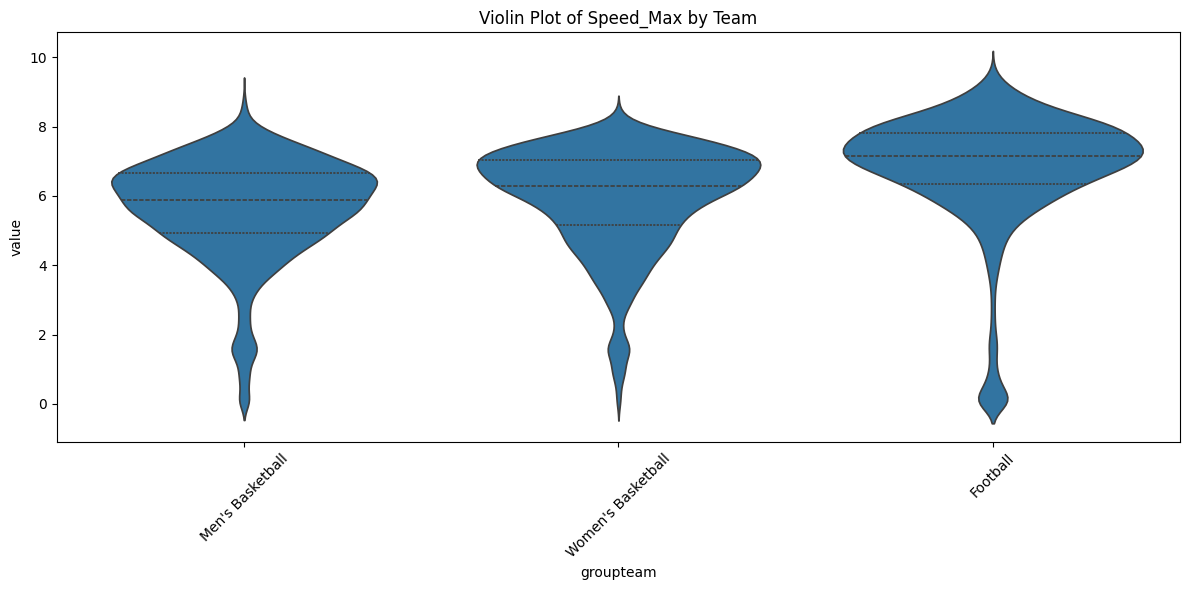

In [3]:
#3.2A Create box plots or violin plots comparing your selected metric(s) between teams

# Load and clean the dataset
df = pd.read_csv('raw/sixmetrics_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna(subset=['value', 'groupteam', 'metric'])

# Get all unique metrics
all_metrics = df['metric'].unique()

# Plot each metric separately
for metric in all_metrics:
    metric_df = df[df['metric'] == metric]

    # Box Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='groupteam', y='value', data=metric_df)
    plt.title(f"Box Plot of {metric} by Team")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Violin Plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='groupteam', y='value', data=metric_df, inner='quartile')
    plt.title(f"Violin Plot of {metric} by Team")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [4]:
#3.2B Calculate statistical significance (t-test or ANOVA as appropriate)

# Load and clean the dataset
df = pd.read_csv('raw/sixmetrics_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna(subset=['value', 'groupteam', 'metric'])

# Prepare results
anova_results = []

# Loop through each metric
for metric in df['metric'].unique():
    metric_df = df[df['metric'] == metric]
    teams = metric_df['groupteam'].unique()

    # Collect values per team
    team_values = [metric_df[metric_df['groupteam'] == team]['value'].values for team in teams]

    # Skip if any team has fewer than 2 values
    if any(len(vals) < 2 for vals in team_values):
        continue

    # Perform ANOVA
    stat, p = f_oneway(*team_values)

    anova_results.append({
        'metric': metric,
        'F_statistic': round(stat, 4),
        'p_value': round(p, 10),
        'significant': p < 0.0500    })

# Display results
anova_df = pd.DataFrame(anova_results)
print("ANOVA results comparing groupteam for each metric:")
print(anova_df.sort_values(by='metric'))

ANOVA results comparing groupteam for each metric:
                     metric  F_statistic  p_value  significant
4            Distance_Total     825.1478      0.0         True
0            Jump Height(M)    5056.5517      0.0         True
3                      Mrsi    2724.4682      0.0         True
1  Peak Propulsive Power(W)    9854.4294      0.0         True
2        Peak Velocity(M/S)    5045.6846      0.0         True
5                 Speed_Max    1306.2755      0.0         True


<Figure size 1400x600 with 0 Axes>

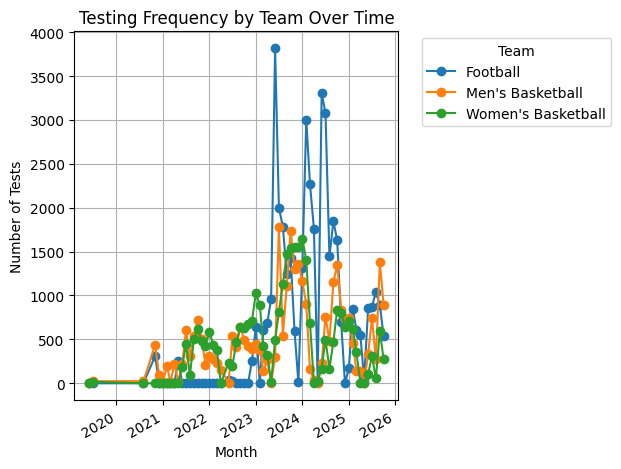

In [6]:
#3.2C  Create a visualization showing testing frequency by team over time

# Load and clean the dataset
df = pd.read_csv('raw/sixmetrics_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna(subset=['timestamp', 'groupteam'])

# Create a 'month' column
df['month'] = df['timestamp'].dt.to_period('M').dt.to_timestamp()

# Group by team and month to count tests
test_counts = df.groupby(['groupteam', 'month']).size().reset_index(name='test_count')

# Pivot for plotting
pivot_df = test_counts.pivot(index='month', columns='groupteam', values='test_count').fillna(0)

# Plot
plt.figure(figsize=(14, 6))
pivot_df.plot(marker='o')
plt.title("Testing Frequency by Team Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Tests")
plt.grid(True)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#3.3  Dashboard Metric 

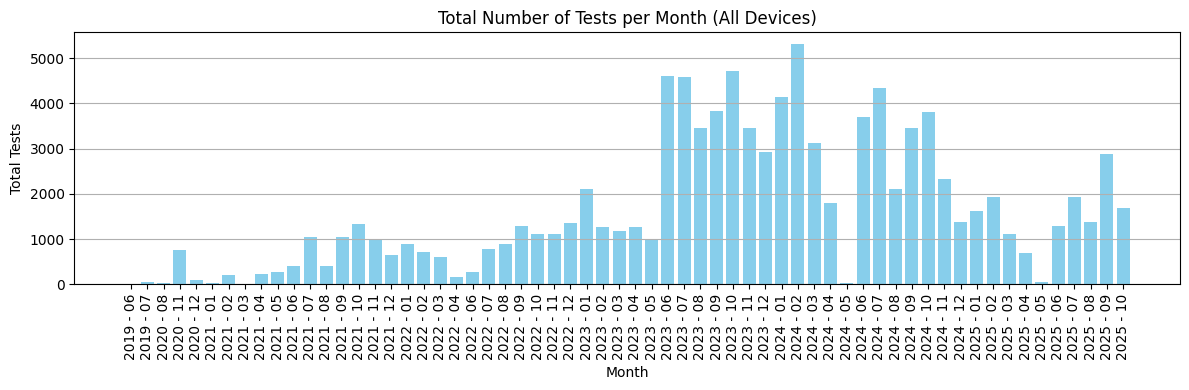

In [6]:
#3.3A Total number of tests per month (all systems combined)
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean the dataset
df = pd.read_csv('raw/sixmetrics_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna(subset=['timestamp', 'device'])

# Create a 'month' column
df['month'] = df['timestamp'].dt.to_period('M').dt.to_timestamp()

# Group by month and count tests
monthly_tests = df.groupby('month').size().reset_index(name='total_tests')

# Format month for display
monthly_tests['month_str'] = monthly_tests['month'].dt.strftime('%Y - %m')

# Plot
plt.figure(figsize=(12, 4))
plt.bar(monthly_tests['month_str'], monthly_tests['total_tests'], color='skyblue')
plt.title("Total Number of Tests per Month (All Devices)")
plt.xlabel("Month")
plt.ylabel("Total Tests")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


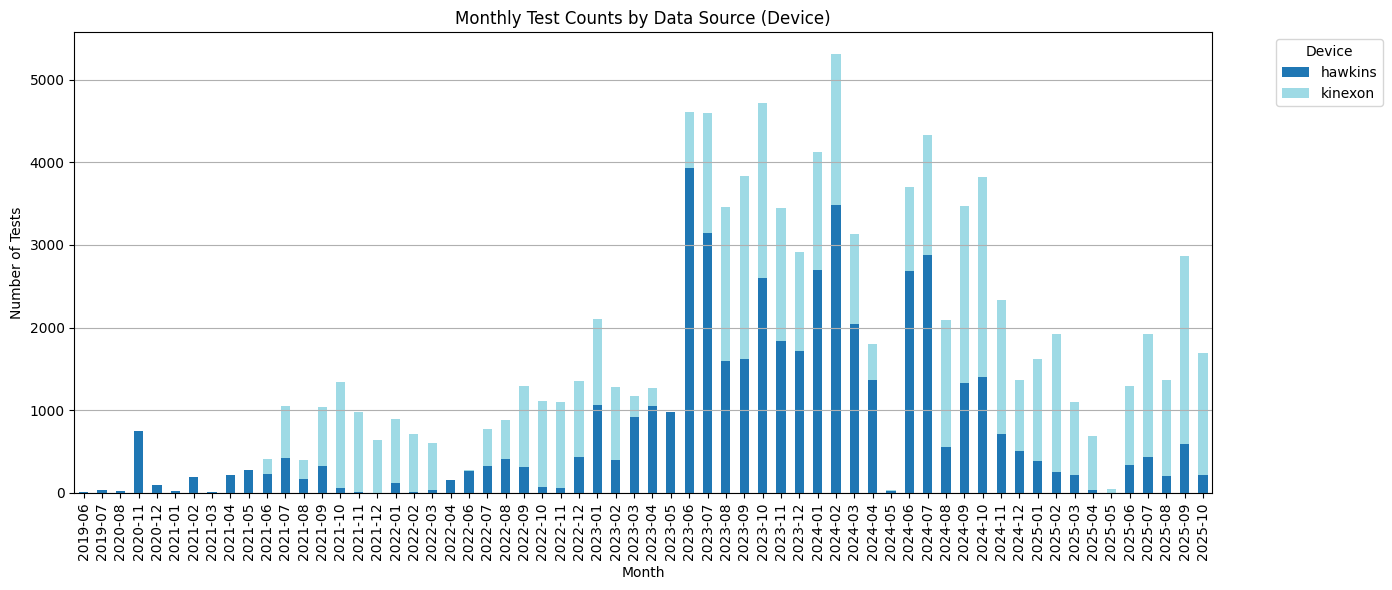

In [7]:

#3.3B Breakdown by data source (stacked bar chart recommended)

# Load and clean the dataset
df = pd.read_csv('raw/sixmetrics_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna(subset=['timestamp', 'device'])

# Create a 'month' column
df['month'] = df['timestamp'].dt.to_period('M').dt.to_timestamp()

# Group by month and device to count tests
monthly_device_counts = df.groupby(['month', 'device']).size().unstack(fill_value=0)

# Plot stacked bar chart
monthly_device_counts.index = monthly_device_counts.index.strftime('%Y-%m')
monthly_device_counts.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title("Monthly Test Counts by Data Source (Device)")
plt.xlabel("Month")
plt.ylabel("Number of Tests")
plt.xticks(rotation=90)
plt.legend(title='Device', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


Gaps or unusual dips in data collection:
        month  test_count
2  2020-08-01          24
4  2020-12-01          96
5  2021-01-01          20
7  2021-03-01          12
12 2021-08-01         398
20 2022-04-01         152
32 2023-05-01         984
44 2024-05-01          38
56 2025-05-01          54


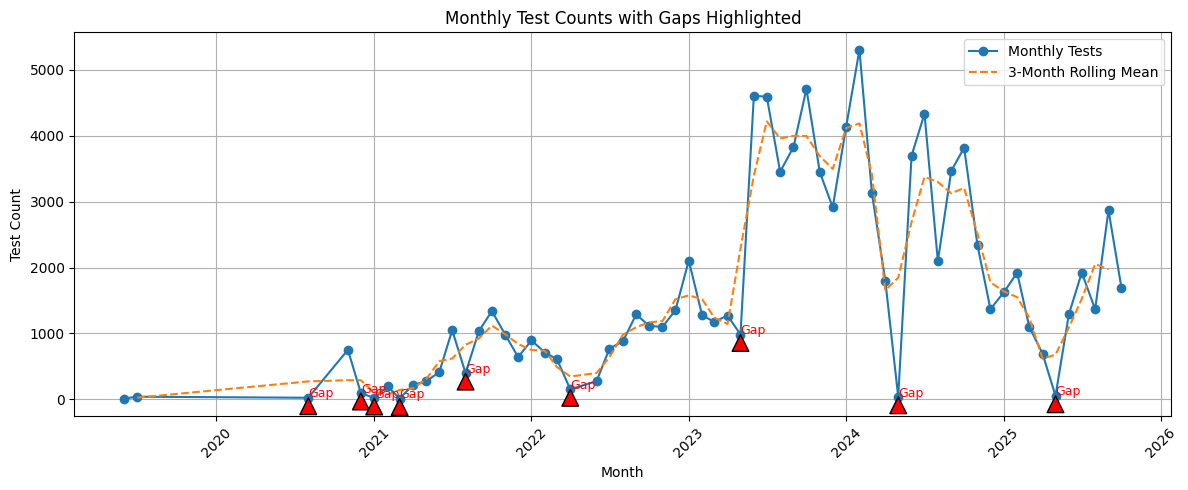

In [8]:
#3.3C Identify any gaps or unusual patterns in data collection

# Load and clean the dataset
df = pd.read_csv('raw/sixmetrics_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna(subset=['timestamp'])

# Create a 'month' column
df['month'] = df['timestamp'].dt.to_period('M').dt.to_timestamp()

# Count tests per month
monthly_counts = df.groupby('month').size().reset_index(name='test_count')

# Calculate rolling mean and flag dips
monthly_counts['rolling_mean'] = monthly_counts['test_count'].rolling(window=3, center=True).mean()
monthly_counts['is_gap'] = monthly_counts['test_count'] < 0.5 * monthly_counts['rolling_mean']

# Display flagged months
gaps = monthly_counts[monthly_counts['is_gap'] | (monthly_counts['test_count'] == 0)]
print("Gaps or unusual dips in data collection:")
print(gaps[['month', 'test_count']])

# Plot with annotations
plt.figure(figsize=(12, 5))
plt.plot(monthly_counts['month'], monthly_counts['test_count'], marker='o', label='Monthly Tests')
plt.plot(monthly_counts['month'], monthly_counts['rolling_mean'], linestyle='--', label='3-Month Rolling Mean')
for _, row in gaps.iterrows():
    plt.annotate('Gap', xy=(row['month'], row['test_count']), xytext=(row['month'], row['test_count'] + 5),
                 arrowprops=dict(facecolor='red', shrink=0.05), fontsize=9, color='red')
plt.title("Monthly Test Counts with Gaps Highlighted")
plt.xlabel("Month")
plt.ylabel("Test Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()